### Exercício 6

#### Pratica 1 -  Dataset MNINST

#### Descricao

- Problema de classificação de numeros escritos a mão.

Atributos

- Imagens dos digitos =)

Etapas:
1. Instale a biblioteca do keras e do tensorflow (atenção isso pode demorar um pouco, 5-10 minutos)
```python
%pip install --user keras
%pip install --user tensorflow
```
2. Importe as bibliotecas necessárias para a classificação
```python
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
```
3. Carregue o Dataset
```python
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[0:10000]
y_train = y_train[0:10000]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
```
4. Determine a AUC e curva RoC para detecção do digito 5 através de uma CNN com o seguinte formato:
```python
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
```
5. Tente melhorar a acurácia para detecção do dígito 5 =)

In [34]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[0:10000]
y_train = y_train[0:10000]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [36]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.Adadelta(),
           metrics=['accuracy'])

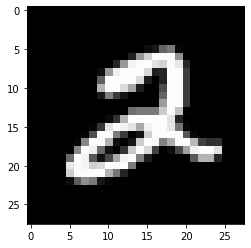

In [37]:
plt.imshow(x_train[5], cmap='gray')

In [38]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [39]:
x_train.shape

(10000, 28, 28, 1)

In [40]:
y_train

array([5, 0, 4, ..., 6, 9, 7], dtype=uint8)

In [41]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [43]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1384704   
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [45]:
valoresTreino = model.fit(x_train, y_train, batch_size=32, epochs=30, verbose = 1, validation_split=0.3)

Epoch 1/30
219/219 [==============================] - 3s 12ms/step - loss: 2.2961 - accuracy: 0.1264 - val_loss: 2.2750 - val_accuracy: 0.2140
Epoch 2/30
219/219 [==============================] - 2s 11ms/step - loss: 2.2745 - accuracy: 0.1629 - val_loss: 2.2538 - val_accuracy: 0.2893
Epoch 3/30
219/219 [==============================] - 2s 11ms/step - loss: 2.2548 - accuracy: 0.1926 - val_loss: 2.2329 - val_accuracy: 0.3390
Epoch 4/30
219/219 [==============================] - 2s 11ms/step - loss: 2.2340 - accuracy: 0.2331 - val_loss: 2.2119 - val_accuracy: 0.3807
Epoch 5/30
219/219 [==============================] - 2s 11ms/step - loss: 2.2124 - accuracy: 0.2679 - val_loss: 2.1906 - val_accuracy: 0.4163
Epoch 6/30
219/219 [==============================] - 2s 11ms/step - loss: 2.1926 - accuracy: 0.3060 - val_loss: 2.1692 - val_accuracy: 0.4500
Epoch 7/30
219/219 [==============================] - 3s 12ms/step - loss: 2.1732 - accuracy: 0.3370 - val_loss: 2.1475 - val_accuracy: 0.4837

In [46]:
valoresTreino.history

{'loss': [2.296135425567627,
  2.2744810581207275,
  2.254815101623535,
  2.2340238094329834,
  2.2123711109161377,
  2.1926469802856445,
  2.1731786727905273,
  2.154853582382202,
  2.130615234375,
  2.1075894832611084,
  2.0872390270233154,
  2.062016248703003,
  2.0365116596221924,
  2.0150558948516846,
  1.9886661767959595,
  1.9679803848266602,
  1.940981149673462,
  1.9166781902313232,
  1.8898255825042725,
  1.8630921840667725,
  1.8362559080123901,
  1.807163953781128,
  1.7793904542922974,
  1.7549670934677124,
  1.7255833148956299,
  1.7021842002868652,
  1.666710615158081,
  1.6424013376235962,
  1.617319941520691,
  1.5861499309539795],
 'accuracy': [0.12642857432365417,
  0.16285714507102966,
  0.19257143139839172,
  0.23314285278320312,
  0.2678571343421936,
  0.3059999942779541,
  0.3370000123977661,
  0.3572857081890106,
  0.38999998569488525,
  0.4187142848968506,
  0.44042858481407166,
  0.4682857096195221,
  0.48828572034835815,
  0.5022857189178467,
  0.525142848491

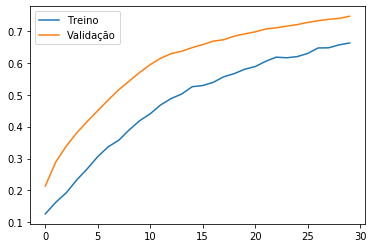

In [47]:
plt.plot(valoresTreino.history['accuracy'])
plt.plot(valoresTreino.history['val_accuracy'])
plt.legend(['Treino', 'Validação'])
plt.show()

#### Pratica 2 -  Dataset FASHION_MNINST

#### Descricao

- Problema de classificação de roupas em escalas de cinza de tamanho 28x28

Atributos

- Imagens das roupas
- Classes:
    - 0	T-shirt/top
    - 1	Trouser
    - 2	Pullover
    - 3	Dress
    - 4	Coat
    - 5	Sandal
    - 6	Shirt
    - 7	Sneaker
    - 8	Bag
    - 9	Ankle boot

Etapas:
1. Instale a biblioteca do keras e do tensorflow (atenção isso pode demorar um pouco, 5-10 minutos)
```python
%pip install --user keras
%pip install --user tensorflow
```
2. Importe as bibliotecas necessárias para a classificação
```python
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
```
3. Carregue o Dataset
```python
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[0:10000]
y_train = y_train[0:10000]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
```
4. Determine a AUC e curva RoC para detecção de camisetas (6)
5. Tente melhorar a acurácia para detecção de camisetas (6) =)

#### Pratica 3 -  Dataset CIFAR10_MNINST

#### Descricao

- Problema de classificação de imagens coloridas de tamanho 32x32

Atributos

- Imagens
- Classes:
    - airplane										
    - automobile										
    - bird										
    - cat										
    - deer										
    - dog										
    - frog										
    - horse										
    - ship										
    - truck

Etapas:
1. Instale a biblioteca do keras e do tensorflow (atenção isso pode demorar um pouco, 5-10 minutos)
```python
%pip install --user keras
%pip install --user tensorflow
```
2. Importe as bibliotecas necessárias para a classificação
```python
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
```
3. Carregue o Dataset
```python
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[0:10000]
y_train = y_train[0:10000]
y_train = y_train.flatten()
y_test = y_test.flatten()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
```
4. Determine a AUC e curva RoC para detecção de sapos (6)
5. Tente melhorar a acurácia para detecção de sapos (6) =)
    - Dica, isto vai levar um tempo 